## Analysis of Tabacco & Alcohol Use Form in MrOS V1 Data (EDA3-V1-TU.ipynb)

This data refers to unhealthy lifestyle choices

#### 1. [Installation of Libraries](#eda_install)
#### 2. [Renaming Columns](#eda_rename)
#### 3. [Subsetting dataFrame](#eda_subset)
#### 4. [Creating Visualizations](#eda_visual)

### <a name = "eda_install"></a>Installation of Libraries

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
import getpass
import os
import csv

import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
import seaborn as sns


user = "dtfp3"
host = "pgsql.dsa.lan"
database = "casestdysu23t03"
password = getpass.getpass()
schema = "public" 

connectionstring = "postgresql://" + user + ":" + password + "@" + host + "/" + database

engine = sqlalchemy.create_engine(connectionstring)

connection = None

try:
    connection = engine.connect()
except Exception as err:
    print("An error has occurred trying to connect: {}".format(err))
    
del password

········


In [2]:
queryTU = "SELECT * FROM public.v1_form_tu"
form_TU = pd.read_sql_query(queryTU, con=connection)
form_TU

,ID,TUSTAFF,TUSMOKE,TUSMKAGE,TUSMKCIG,TUSMKNOW,TUSMKCGN,TUSMKSTP,TUSNUFF,TUSNFAGE,...,TUDR5PLS,TUDR5PER,TUDR5NO,TUDR9PLS,TUDR9PER,TUDR9NO,TUDREVER,TUDRPRWK,TUDRSMC,TU
0,BI0001,BI01,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
1,BI0002,BI16,1.0,21.0,3.0,0.0,NaN,22.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
2,BI0003,BI01,1.0,18.0,10.0,0.0,NaN,31.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,5.000000,2.0,1.0
3,BI0004,BI16,1.0,13.0,20.0,0.0,NaN,40.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.766577,1.0,1.0
4,BI0005,BI01,1.0,21.0,50.0,0.0,NaN,50.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,SD26,1.0,23.0,20.0,0.0,NaN,36.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
5990,SD9015,SD04,1.0,13.0,20.0,0.0,NaN,33.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,7.000000,3.0,1.0
5991,SD9016,SD26,1.0,15.0,15.0,0.0,NaN,30.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,7.000000,3.0,1.0
5992,SD9017,SD26,1.0,12.0,20.0,0.0,NaN,49.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.0,1.0


In [3]:
form_TU=pd.DataFrame(form_TU)

In [4]:
for col in form_TU:
    print(col)

ID
TUSTAFF
TUSMOKE
TUSMKAGE
TUSMKCIG
TUSMKNOW
TUSMKCGN
TUSMKSTP
TUSNUFF
TUSNFAGE
TUSNFNOW
TUSNFCPW
TUSNFSTP
TUPIPE
TUPIPAGE
TUPIPAMT
TUDRINKA
TUCAGEC
TUCAGEA
TUCAGEG
TUCAGEE
TUCAGE
TURSMOKE
TUSMYRST
TUPACKYR
TURSNUFF
TU12DRIN
TUDRAVG
TUDRFREQ
TUDRDAY
TUDR5PLS
TUDR5PER
TUDR5NO
TUDR9PLS
TUDR9PER
TUDR9NO
TUDREVER
TUDRPRWK
TUDRSMC
TU


In [5]:
TUcolNames = pd.read_excel('/dsa/groups/casestudy2023su/team03/V1TU.xlsx').columns
TUcolNames

Index(['Id', 'STAFFIDFORTOBACCOALCOHOLUSEFORM',
       'Haveyousmoke…100cigarettes…life?', 'Howold...whenfirststartedsmoking?',
       'Avgcigs/dayentiretimesmoking', 'Doyousmokecigarettesnow?',
       'Avgcigs/daysmokednow', 'Howoldwere...whenstoppedsmoking?',
       'Have…usedchewingtobacco/snuff?',
       'Howold…when…started…chewing/snuff..?',
       'Doyouusesnuff/chewingtobacconow?', 'Howmanycntainrs/weeksnuff/chewnow',
       'Howoldwhenstoppedsnuff/chew?', 'Haveyou..smoke..pipe/cigarsregul..?',
       'Howmanyyearssmokedpipe/cigars?', 'Howmuchpipe/cigarsdid/dosmoke/week',
       'Have...had…12alcoholicdrinks…life?', 'Haveyou…felt…cutdown…drinking?',
       'Havepeople…annoyedyou...drinking?',
       'Haveyou…feltbadorguilty…drinking?',
       'Have..had..drinkfirst..themorning?', 'score', 'SMOKINGSTATUS',
       'YRSSTOPPEDSMOKINGCIGARETTES', 'PACKYRS', 'TOBACCOSTATUS',
       'In..past12months..12drinksalcoh.?', 'a.#daysdrankperwk/mo/yr',
       'a.Calendarunitforanydrinking',

### <a name = "eda_rename"></a>Renaming Columns

In [6]:
form_TU = form_TU.rename(columns=dict(zip(form_TU.columns, TUcolNames)))
form_TU

,Id,STAFFIDFORTOBACCOALCOHOLUSEFORM,Haveyousmoke…100cigarettes…life?,Howold...whenfirststartedsmoking?,Avgcigs/dayentiretimesmoking,Doyousmokecigarettesnow?,Avgcigs/daysmokednow,Howoldwere...whenstoppedsmoking?,Have…usedchewingtobacco/snuff?,Howold…when…started…chewing/snuff..?,...,c.#daysperwk/mo/yrhad>=5drinks,c.Calendarunitfor>=5drinks,c.Didnothave>=5drinksonanyday,d.#daysperwk/mo/yrhad>=9drinks,d.Calendarunitfor>=9drinks,d.Didnothave>=9drinksonanyday,Everdrank>=5drinks/dayeveryday,numberofdrinks/wk(calcvar),OFDRINKSPERWEEK(SM.CATEGORIES),FormIndicator
0,BI0001,BI01,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
1,BI0002,BI16,1.0,21.0,3.0,0.0,NaN,22.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
2,BI0003,BI01,1.0,18.0,10.0,0.0,NaN,31.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,5.000000,2.0,1.0
3,BI0004,BI16,1.0,13.0,20.0,0.0,NaN,40.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.766577,1.0,1.0
4,BI0005,BI01,1.0,21.0,50.0,0.0,NaN,50.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,SD26,1.0,23.0,20.0,0.0,NaN,36.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0
5990,SD9015,SD04,1.0,13.0,20.0,0.0,NaN,33.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,7.000000,3.0,1.0
5991,SD9016,SD26,1.0,15.0,15.0,0.0,NaN,30.0,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,0.0,7.000000,3.0,1.0
5992,SD9017,SD26,1.0,12.0,20.0,0.0,NaN,49.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.0,1.0


In [7]:
form_TU.shape

(5994, 40)

In [8]:
form_TU.dtypes

Id                                       object
STAFFIDFORTOBACCOALCOHOLUSEFORM          object
Haveyousmoke…100cigarettes…life?        float64
Howold...whenfirststartedsmoking?       float64
Avgcigs/dayentiretimesmoking            float64
Doyousmokecigarettesnow?                float64
Avgcigs/daysmokednow                    float64
Howoldwere...whenstoppedsmoking?        float64
Have…usedchewingtobacco/snuff?          float64
Howold…when…started…chewing/snuff..?    float64
Doyouusesnuff/chewingtobacconow?        float64
Howmanycntainrs/weeksnuff/chewnow       float64
Howoldwhenstoppedsnuff/chew?            float64
Haveyou..smoke..pipe/cigarsregul..?     float64
Howmanyyearssmokedpipe/cigars?          float64
Howmuchpipe/cigarsdid/dosmoke/week      float64
Have...had…12alcoholicdrinks…life?      float64
Haveyou…felt…cutdown…drinking?          float64
Havepeople…annoyedyou...drinking?       float64
Haveyou…feltbadorguilty…drinking?       float64
Have..had..drinkfirst..themorning?      

In [9]:
for col in form_TU:
  
    print(col)

Id
STAFFIDFORTOBACCOALCOHOLUSEFORM
Haveyousmoke…100cigarettes…life?
Howold...whenfirststartedsmoking?
Avgcigs/dayentiretimesmoking
Doyousmokecigarettesnow?
Avgcigs/daysmokednow
Howoldwere...whenstoppedsmoking?
Have…usedchewingtobacco/snuff?
Howold…when…started…chewing/snuff..?
Doyouusesnuff/chewingtobacconow?
Howmanycntainrs/weeksnuff/chewnow
Howoldwhenstoppedsnuff/chew?
Haveyou..smoke..pipe/cigarsregul..?
Howmanyyearssmokedpipe/cigars?
Howmuchpipe/cigarsdid/dosmoke/week
Have...had…12alcoholicdrinks…life?
Haveyou…felt…cutdown…drinking?
Havepeople…annoyedyou...drinking?
Haveyou…feltbadorguilty…drinking?
Have..had..drinkfirst..themorning?
score
SMOKINGSTATUS
YRSSTOPPEDSMOKINGCIGARETTES
PACKYRS
TOBACCOSTATUS
In..past12months..12drinksalcoh.?
a.#daysdrankperwk/mo/yr
a.Calendarunitforanydrinking
b.Howmanydrinksdidyouhaveaday?
c.#daysperwk/mo/yrhad>=5drinks
c.Calendarunitfor>=5drinks
c.Didnothave>=5drinksonanyday
d.#daysperwk/mo/yrhad>=9drinks
d.Calendarunitfor>=9drinks
d.Didnothave>=9drinks

remove non-specific columns

In [10]:
form_TU = form_TU.drop(form_TU.columns[[1, 39]], axis=1)
form_TU.shape

(5994, 38)

In [11]:
tu_with_nulls = form_TU
form_NF = form_TU.fillna(0.0)
for col in form_TU:
  
    print(form_TU[col].unique())

['BI0001' 'BI0002' 'BI0003' ... 'SD9016' 'SD9017' 'SD9018']
[0. 1.]
[nan 21. 18. 13. 16. 19. 20. 14. 12. 17. 15. 43. 30. 33. 37. 23. 11. 24.
 28. 22. 26.  6. 25. 27. 10. 40.  8. 50. 39. 38.  9. 55. 45. 35.  7. 32.
 41. 36. 29.  5. 46. 58. 31. 57. 34. 79.]
[ nan   3.  10.  20.  50.  40.  60.  15.  30.  35.  25.   1.   6.  12.
  16.  45.   5.  18.   8.  14.   2.  75.  17.   7.   4.  24.  80.  33.
  48.  27. 110. 120.  70. 100.  19.  36.  13.  22.  90.  26.  11.  38.
  28.  21.   9.  55.  43.]
[nan  0.  1.]
[nan 18. 30. 20. 11. 10.  4. 12.  6. 40. 15.  5. 17. 25.  2.  1.  3.  8.
 13. 39. 50. 27.  9.]
[nan 22. 31. 40. 50. 60. 30. 63. 45. 43. 62. 53. 34. 48. 70. 52. 59. 57.
 67. 42. 55. 51. 37. 64. 28. 23. 58. 27. 72. 33. 66. 56. 36. 35. 46. 26.
 44. 32. 74. 29. 20. 21. 47. 17. 41. 25. 24. 16. 49. 54. 19. 39. 75. 68.
 38. 69. 61. 65. 73. 79. 18. 71. 83. 13. 14. 80. 76. 77. 12. 78. 11. 15.
 10.]
[0. 1.]
[nan 50. 58. 15. 25. 32. 35.  9. 10. 30. 45. 27. 41. 17. 46. 40. 55. 22.
  6. 12. 48. 65.

In [12]:
#import matplotlib.pyplot as plt
#from plotnine import *
#import numpy as np
#import seaborn as sns
#form_TU.plot(kind='hist').legend(loc='center right', bbox_to_anchor=(1.8, 0.5))

### <a name = "eda_subset"></a>Subsetting DataFrame

In [13]:

Tobacco = form_TU[['Haveyousmoke…100cigarettes…life?', 'Doyousmokecigarettesnow?', 'Have…usedchewingtobacco/snuff?',
                  'Doyouusesnuff/chewingtobacconow?', 'Haveyou..smoke..pipe/cigarsregul..?']]

In [14]:
#Alcohol = form_TU[['Have...had…12alcoholicdrinks…life?',' Haveyou…felt…cutdown…drinking?',' Havepeople…annoyedyou...drinking?',
#'Haveyou…feltbadorguilty…drinking?','  In..past 12 months..12 drinks alcoh.',
#'Have..had..drinkfirst..themorning?','  In..past 12 months..12 drinks alcoh.','  Everdrank>=5drinks/dayeveryday]]
Alcohol = form_TU[['Have...had…12alcoholicdrinks…life?','Haveyou…felt…cutdown…drinking?','Havepeople…annoyedyou...drinking?',
'Haveyou…feltbadorguilty…drinking?','In..past12months..12drinksalcoh.?','Have..had..drinkfirst..themorning?',
                   'Everdrank>=5drinks/dayeveryday']]


In [15]:
Status = form_TU[['SMOKINGSTATUS',  'TOBACCOSTATUS']]

In [16]:
AlcoholPerWeek = form_TU[['OFDRINKSPERWEEK(SM.CATEGORIES)']]

### <a name = "eda_visual"></a>Creating Visualizations

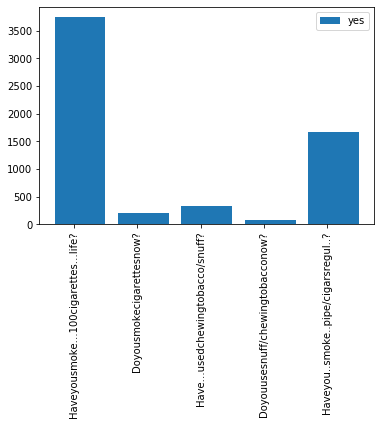

In [17]:
ones = [Tobacco[column].value_counts()[1] for column in Tobacco.columns]
n=len(Tobacco.columns)

plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n),Tobacco.columns, rotation='vertical')

plt.legend()
plt.show()

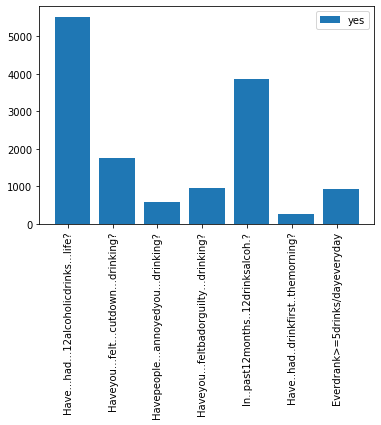

In [18]:
ones = [Alcohol[column].value_counts()[1] for column in Alcohol.columns]
n=len(Alcohol.columns)

plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n),Alcohol.columns, rotation='vertical')

plt.legend()
plt.show()

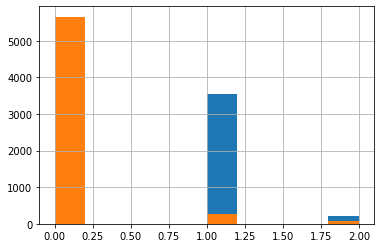

In [19]:
Status['SMOKINGSTATUS'].hist()
Status['TOBACCOSTATUS'].hist()

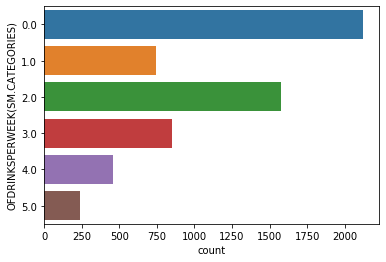

In [20]:
sns.countplot(data=AlcoholPerWeek, y= 'OFDRINKSPERWEEK(SM.CATEGORIES)')

In [21]:
# Define the file path and name
file_path = "/dsa/groups/casestudy2023su/team03/model_data/TU_results.csv"

# Export the DataFrame to CSV
form_TU.to_csv(file_path, index=False)

# Set file permissions to 777
os.chmod(file_path, 0o777)

file_path_with_nulls = "/dsa/groups/casestudy2023su/team03/model_data/null_included/TU_results_with_nulls.csv"
tu_with_nulls.to_csv(file_path_with_nulls, index=False)
os.chmod(file_path_with_nulls, 0o777)

print("DataFrame exported to CSV with 777 permissions successfully!")

DataFrame exported to CSV with 777 permissions successfully!
